# 01 - Problem (case study)

Data Description: ...


Goal: ...

# 02 - Getting Data

Import libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math 
from math import sqrt

Read the .csv file

In [2]:
# read the data
data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')
# Dataframe shape
data.shape

(9134, 24)

Get basic info

In [3]:
# DataFrame info
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [4]:
# types of data
data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
# data describe 
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# 03 - Cleaning/Wrangling/EDA

Standarize header names

In [6]:
# standarize header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols
data = data.rename(columns={'EMPLOYMENTSTATUS':'EMPLOYMENT STATUS'})
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

Deal with NaN values.

In [7]:
# Check and deal with NaN values --> no Nan values
data.isnull().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
dtype: int64

drop duplicates

In [8]:
data = data.drop_duplicates()

plots

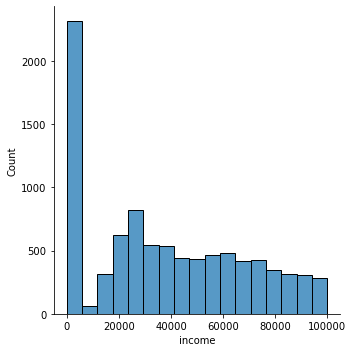

In [9]:
# plot of the total number on a column
sns.displot(data['income'])
plt.show()

<AxesSubplot:xlabel='response', ylabel='count'>

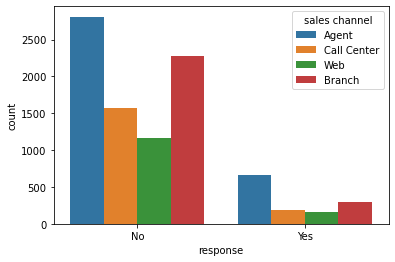

In [10]:
# plot of the response rate by the sales channel
sns.countplot(x="response", hue="sales channel", data=data)

In [11]:
# plot of the response by the total claim amount

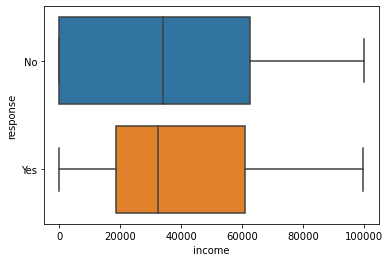

In [12]:
sns.boxplot(x="income", y="response", data=data)
plt.show()

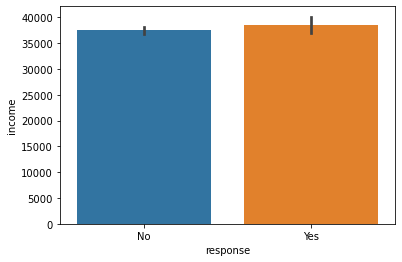

In [13]:
sns.barplot(x="response", y="income", data=data)
plt.show()

Removing outliers based on the IQR

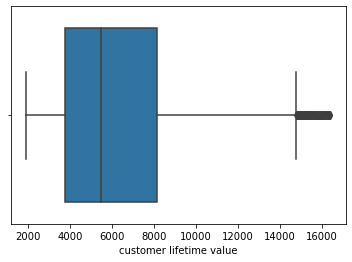

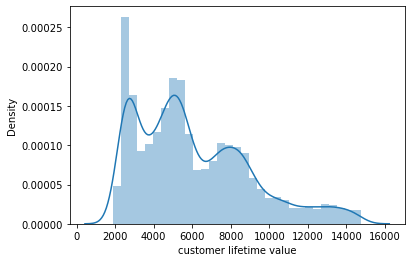

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [48]:
sns.boxplot(x=data['customer lifetime value'])
plt.show()

iqr = np.percentile(data['customer lifetime value'],75) - np.percentile(data['customer lifetime value'],25)
upper_limit = np.percentile(data['customer lifetime value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer lifetime value'],25) - 1.5*iqr

data = data[(data['customer lifetime value']>lower_limit) & (data['customer lifetime value']<upper_limit)]
sns.distplot(data['customer lifetime value'])
plt.show()



In [50]:
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

Split X-y

In [15]:
# SPLIT X-y 
y = data['income']
X = data.drop(['income'], axis=1)


Separate X_num and X_cat

In [16]:
# SEPARATE NUMERIC AND CATEGORICAL VALUES
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

Numerical Features : exploration and normalization

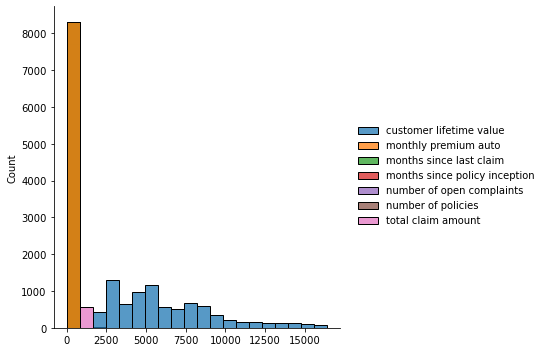

In [17]:
# check the normality of the numerical variables
sns.displot(X_num, bins=20)

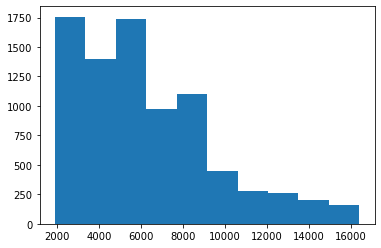

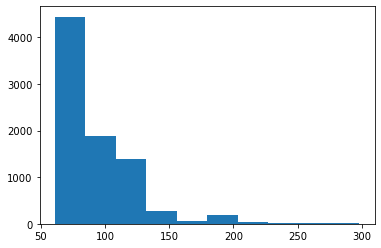

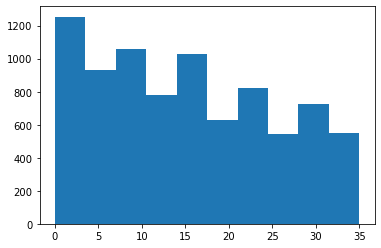

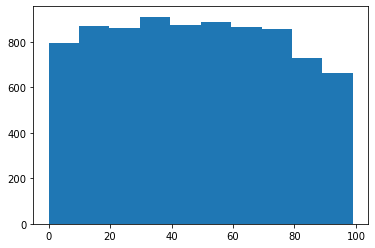

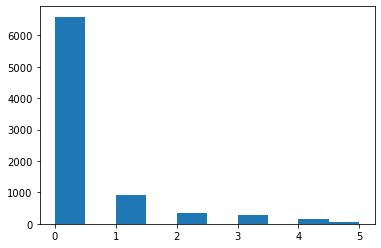

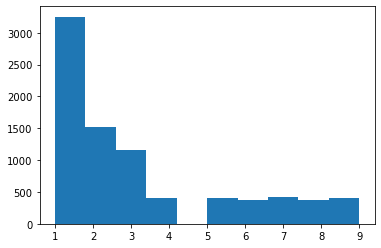

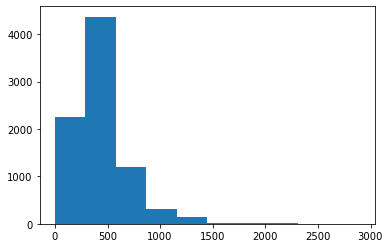

In [18]:
# construct histograms 
for i in range(len(X_num.columns)):
    plt.hist(X_num[X_num.columns[i]]) 
    plt.show()

In [19]:
# correlation of the numeric values
X_num.corr()

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.458173,-0.008670,-0.004105,-0.032600,0.242195,0.239107
monthly premium auto,0.458173,1.000000,0.003352,0.015991,-0.008795,-0.026566,0.607531
months since last claim,-0.008670,0.003352,1.000000,-0.045241,0.008160,0.010976,0.004844
months since policy inception,-0.004105,0.015991,-0.045241,1.000000,-0.000118,-0.013653,-0.001050
number of open complaints,-0.032600,-0.008795,0.008160,-0.000118,1.000000,-0.001115,-0.007328
number of policies,0.242195,-0.026566,0.010976,-0.013653,-0.001115,1.000000,-0.010399
total claim amount,0.239107,0.607531,0.004844,-0.001050,-0.007328,-0.010399,1.000000


In [ ]:
# Do the distributions for different numerical variables look like a normal distribution

# For the numerical variables, check the multicollinearity between the features


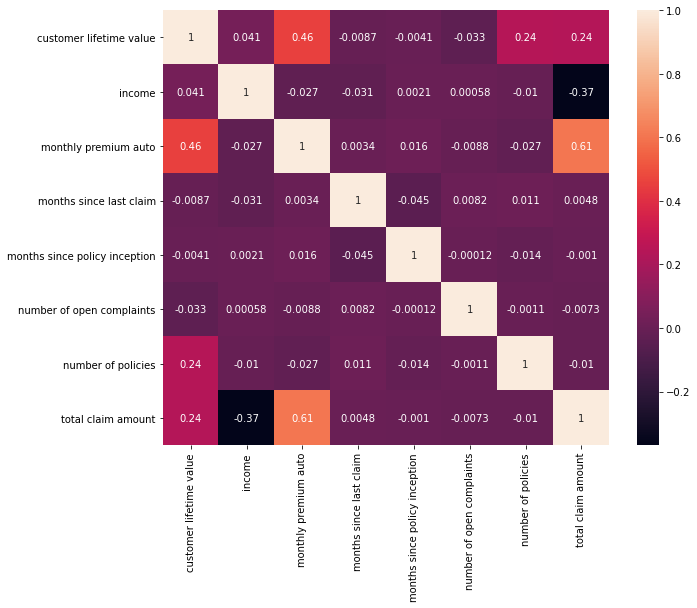

In [20]:
# correlation matrix
correlations_matrix = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Drop one of the two features that show a high correlation between them (greater than 0.9).
# Write code for both the correlation matrix and for seaborn heatmap. 

Skewness: Asymmetry of your distribution. 
(Acceptable range within [-2,2]. Positive values mean long tails to the right)

In [21]:
from scipy.stats import skew
X_num.apply(skew)

customer lifetime value          0.960469
monthly premium auto             2.056828
months since last claim          0.282834
months since policy inception    0.045046
number of open complaints        2.753687
number of policies               1.139505
total claim amount               1.642684
dtype: float64

Kurtosis: Measures the “spikeness” of your distribution. (Acceptable range within [-7,7])


In [22]:
from scipy.stats import kurtosis
kurtosis(X_num)


array([ 0.42160215,  6.52215721, -1.07406367, -1.13422803,  7.50042475,
        0.04305221,  6.00284058])

X_NUMERICAL NORMALIZER (by row)

In [23]:

# transformer = Normalizer().fit(X_num)
# x_normalized = transformer.transform(X_num)

In [24]:
# df_normalized = pd.DataFrame(x_normalized, columns = X_num.columns)

In [25]:
# df_normalized

X_NUMERICAL STANDARIZATION (by column)

In [26]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(X_num)
df_normalized=transformer.transform(X_num) # should be df_standarized, I didn't change it in order to avoid changing the rest of the code

In [27]:
df_normalized = pd.DataFrame(df_normalized, columns=X_num.columns)
df_normalized

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
0,-1.085002,-0.707014,1.690097,-1.542454,-0.424094,-0.824816,-0.138687
1,0.216144,0.098255,-0.202664,-0.217172,-0.424094,2.008220,2.569937
2,2.039439,0.549205,0.295431,-0.360446,-0.424094,-0.420097,0.520322
3,0.421786,0.484784,0.295431,0.606653,-0.424094,1.603501,0.387582
4,-1.069518,-0.578171,-0.302283,-0.145535,-0.424094,-0.824816,-1.033565
...,...,...,...,...,...,...,...
8312,-0.672415,0.420362,0.096193,0.355924,-0.424094,-0.824816,0.428940
8313,-0.982234,-0.384906,-0.103045,-0.718630,-0.424094,-0.824816,-0.159042
8314,0.581660,-0.191642,-0.601140,-0.396264,2.811859,-0.420097,1.334058
8315,0.384313,0.162676,1.889335,-1.614091,-0.424094,-0.015377,0.972795


Categorical Features : exploration and encoding

In [28]:

X_cat.drop(['customer', 'effective to date'], axis=1, inplace = True)

In [29]:
X_cat.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location code', 'marital status', 'policy type', 'policy',
       'renew offer type', 'sales channel', 'vehicle class', 'vehicle size'],
      dtype='object')

In [30]:
X_cat['education'].value_counts(dropna=False)

Bachelor                2505
College                 2466
High School or Below    2359
Master                   671
Doctor                   316
Name: education, dtype: int64

In [31]:
# To know how many different values a column has
X_cat['state'].value_counts(dropna=False)

California    2869
Oregon        2368
Arizona       1565
Nevada         799
Washington     716
Name: state, dtype: int64

In [32]:
#One Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_cat)
encoder.categories_  


[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
       dtype=object),
 array(['F', 'M'], dtype=object),
 array(['Rural', 'Suburban', 'Urban'], dtype=object),
 array(['Divorced', 'Married', 'Single'], dtype=object),
 array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object),
 array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
        'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
        'Special L3'], dtype=object),
 array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object),
 array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object),
 array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
        'Two-Door Car'],

In [33]:
# Checking the encoded categories
encoder.transform(X_cat).toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [34]:
# Categories column names
column_names = encoder.get_feature_names(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location code', 'marital status', 'policy type', 'policy',
       'renew offer type', 'sales channel', 'vehicle class', 'vehicle size'])

In [35]:
# Get categories dataframe
df_encoded = pd.DataFrame(encoder.transform(X_cat).toarray(), columns = column_names)

In [36]:
df_encoded.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location code_Rural,location code_Suburban,location code_Urban,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


CONCATENATING

In [37]:
# Concatenating categorical and numerical
df_concat = pd.concat([df_normalized,df_encoded], axis=1)

In [38]:
df_concat.head()

,customer lifetime value,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location code_Rural,location code_Suburban,location code_Urban,marital status_Divorced,marital status_Married,marital status_Single,policy type_Corporate Auto,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer1,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Agent,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Four-Door Car,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Large,vehicle size_Medsize,vehicle size_Small
0,-1.085002,-0.707014,1.690097,-1.542454,-0.424094,-0.824816,-0.138687,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.216144,0.098255,-0.202664,-0.217172,-0.424094,2.008220,2.569937,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.039439,0.549205,0.295431,-0.360446,-0.424094,-0.420097,0.520322,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.421786,0.484784,0.295431,0.606653,-0.424094,1.603501,0.387582,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.069518,-0.578171,-0.302283,-0.145535,-0.424094,-0.824816,-1.033565,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8317 entries, 0 to 8316
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer lifetime value         8317 non-null   float64
 1   monthly premium auto            8317 non-null   float64
 2   months since last claim         8317 non-null   float64
 3   months since policy inception   8317 non-null   float64
 4   number of open complaints       8317 non-null   float64
 5   number of policies              8317 non-null   float64
 6   total claim amount              8317 non-null   float64
 7   state_Arizona                   8317 non-null   float64
 8   state_California                8317 non-null   float64
 9   state_Nevada                    8317 non-null   float64
 10  state_Oregon                    8317 non-null   float64
 11  state_Washington                8317 non-null   float64
 12  response_No                     83

TRAIN AND TEST SET 

In [40]:
# Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(df_concat, y, test_size=0.2)

# 05 - Modeling

Apply model.

In [41]:
# Fitting the model
lm = LinearRegression()
model = lm.fit(X_train, y_train)

# 06 - Model Validation

In [42]:
# Make predictions
predictions = lm.predict(X_test)

In [43]:
#R2
print("The R2 of the linear model is:", round(r2_score(y_test, predictions),2))


The R2 of the linear model is: 0.68


In [44]:
#MSE
mse = mean_squared_error(y_test, predictions)
print("The MSE =",mse)

The MSE = 302499429.3167067


In [45]:
#RMSE
rmse = math.sqrt(mse)
print("The RMSE =",rmse)

The RMSE = 17392.51072492717


In [46]:
#MAE
mae = mean_absolute_error(y_test, predictions)
print("The MAE =",mae)

The MAE = 12762.388822115385


In [47]:
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)


The intercept of the model is =  -3.0021849745258564e+16
The coefficients of the model are =  [ 5.89473189e+02  1.17628609e+03 -7.26266832e+02  3.21430205e+02
  1.19126928e+02 -2.76895855e+02 -9.88448780e+02 -4.14482611e+14
 -4.14482611e+14 -4.14482611e+14 -4.14482611e+14 -4.14482611e+14
  4.00732561e+14  4.00732561e+14  8.39651836e+15  8.39651836e+15
  8.39651836e+15 -7.20309827e+14 -7.20309827e+14 -7.20309827e+14
 -7.20309827e+14 -7.20309827e+14 -4.32528680e+15 -4.32528680e+15
 -4.32528680e+15 -4.32528680e+15 -4.32528680e+15 -1.27050409e+14
 -1.27050409e+14  1.50367431e+15  1.50367431e+15  1.50367431e+15
 -1.66971555e+13 -1.66971555e+13 -1.66971555e+13  1.07636409e+15
  1.25456184e+15  5.99023884e+14  4.07204759e+14  4.07204759e+14
  4.07204759e+14  2.29007005e+14  2.29007005e+14  2.29007005e+14
  8.84544960e+14  8.84544960e+14  8.84544960e+14  9.19688411e+15
  9.19688411e+15  9.19688411e+15  9.19688411e+15  4.34721620e+15
  4.34721620e+15  4.34721620e+15  4.34721620e+15  7.96181466e